## Regressão Linear

Modelagem linear aplicado à analise da poluição amosferica em cidades costeiras e não costeiras

In [ ]:
install.packages('Ecdat')
install.packages('Ecfun')
install.packages('gvlma')

library(dplyr)
library(ggplot2)
library(Ecdat)
library(Ecfun)
library(gvlma)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: Ecfun


Attaching package: ‘Ecfun’


The following object is masked from ‘package:base’:

    sign



Attaching package: ‘Ecdat’


The following object is masked from ‘package:datasets’:

    Orange




# Analise expliratória dos dados

 O que afeta a qualidade do ar nas cidades? Como?

In [ ]:
df <- data.frame(Airq)
head(df)

,airq,vala,rain,coas,dens,medi
,<int>,<dbl>,<dbl>,<fct>,<dbl>,<int>
1,104,2734.4,12.63,yes,1815.86,4397
2,85,2479.2,47.14,yes,804.86,5667
3,127,4845.0,42.77,yes,1907.86,15817
4,145,19733.8,33.18,no,1876.08,32698
5,84,4093.6,34.55,yes,340.93,6250
6,135,1849.8,14.81,no,335.52,4705


In [ ]:
tail(df)

,airq,vala,rain,coas,dens,medi
,<int>,<dbl>,<dbl>,<fct>,<dbl>,<int>
25,74,5608.6,42.36,yes,2649.07,8947
26,124,3700.0,29.51,no,9642.86,5952
27,69,1395.5,42.92,yes,1105.55,4146
28,118,3022.8,41.32,no,910.79,3207
29,129,1515.4,31.22,no,379.58,853
30,129,1878.9,30.95,no,455.92,853


Dicionário de dados

airq: (quantitativo contínuo) índice que qualidade do ar na cidade (quanto menor, melhor)

vala: (quantitativo contínuo) valor das empresas da cidade (em milhares de dolares)

rain: (quantitativo contínuo) volume de chuva (em polegadas)

coas:(categórico binário) posição costeira da cidade (Sim / não)

dens: (quantitativo contínuo) densidade opulacional (milha quadrada)

medi: (quantitativo contínuo) renda média per cata (dólares)

In [ ]:
summary(df)

      airq            vala              rain        coas         dens        
 Min.   : 59.0   Min.   :  992.9   Min.   :12.63   no : 9   Min.   :  271.6  
 1st Qu.: 81.0   1st Qu.: 1535.8   1st Qu.:31.02   yes:21   1st Qu.:  365.2  
 Median :114.0   Median : 2629.8   Median :36.66            Median :  796.2  
 Mean   :104.7   Mean   : 4188.5   Mean   :36.08            Mean   : 1728.6  
 3rd Qu.:126.2   3rd Qu.: 4141.4   3rd Qu.:42.70            3rd Qu.: 1635.2  
 Max.   :165.0   Max.   :19733.8   Max.   :68.13            Max.   :12957.5  
      medi      
 Min.   :  853  
 1st Qu.: 3340  
 Median : 4858  
 Mean   : 9477  
 3rd Qu.: 8715  
 Max.   :59460  

In [ ]:
sum(is.na(df))

[1] 0

In [ ]:
table(df$coas)


 no yes 
  9  21 

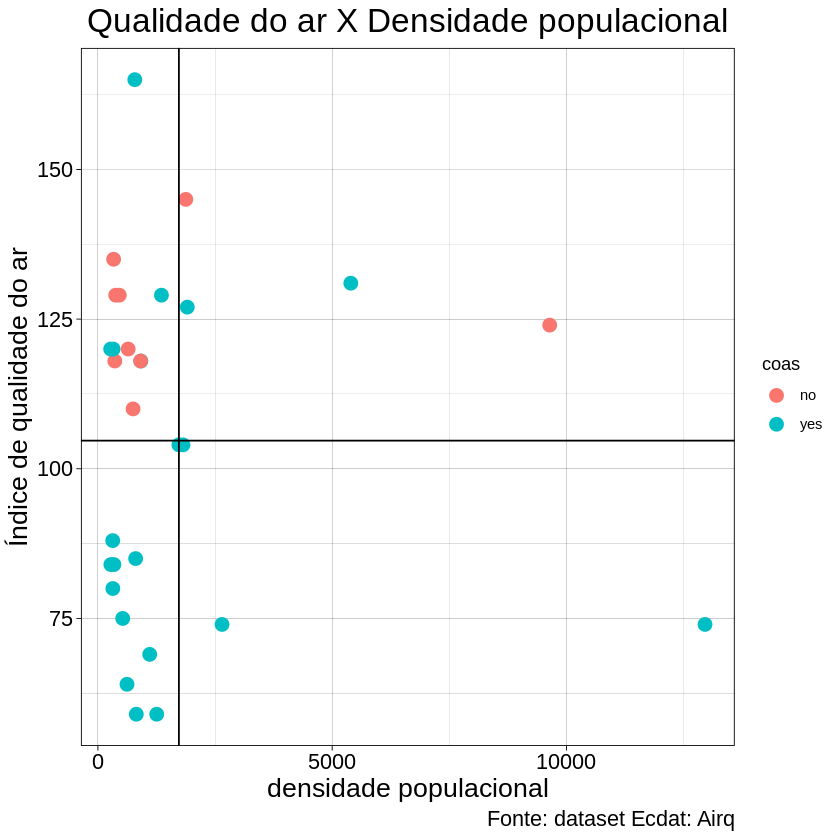

In [ ]:
ggplot(data= df, aes(x = dens, y= airq, color = coas))+
geom_point(size= 3.5)+
geom_hline(yintercept = mean(df$airq))+
geom_vline(xintercept = mean(df$dens))+
labs(x= 'densidade populacional', y= 'Índice de qualidade do ar', title = 'Qualidade do ar X Densidade populacional', caption= 'Fonte: dataset Ecdat: Airq')+
theme_linedraw()+
theme(
  plot.title=element_text(size = 20, hjust = 0.5),
  plot.caption = element_text(size=13, hjust=1),
  axis.title.y = element_text(size=16, hjust= 0.5),
  axis.title.x= element_text(size=16, hjust= 0.5),
  axis.text.x = element_text(size= 13),
  axis.text.y = element_text(size= 13)
)

`geom_smooth()` using formula 'y ~ x'



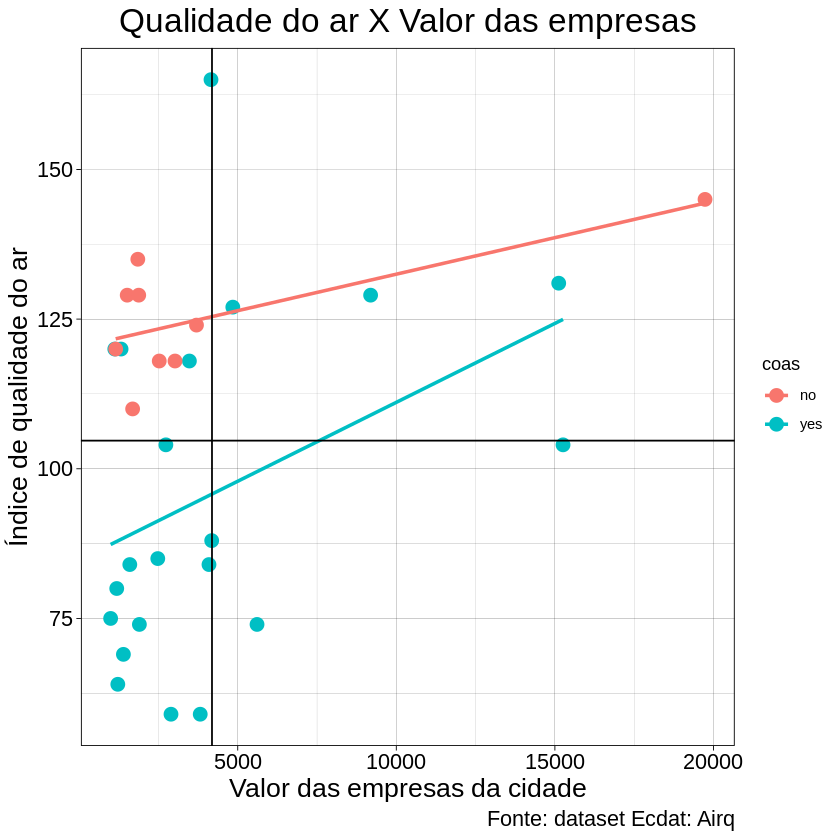

In [ ]:
ggplot(data= df, aes(x = vala, y= airq, color = coas))+
geom_point(size= 3.5)+
geom_smooth(method = lm, se= F)+
geom_hline(yintercept = mean(df$airq))+
geom_vline(xintercept = mean(df$vala))+
labs(x= 'Valor das empresas da cidade', y= 'Índice de qualidade do ar', title = 'Qualidade do ar X Valor das empresas', caption= 'Fonte: dataset Ecdat: Airq')+
theme_linedraw()+
theme(
  plot.title=element_text(size = 20, hjust = 0.5),
  plot.caption = element_text(size=13, hjust=1),
  axis.title.y = element_text(size=16, hjust= 0.5),
  axis.title.x= element_text(size=16, hjust= 0.5),
  axis.text.x = element_text(size= 13),
  axis.text.y = element_text(size= 13)
)

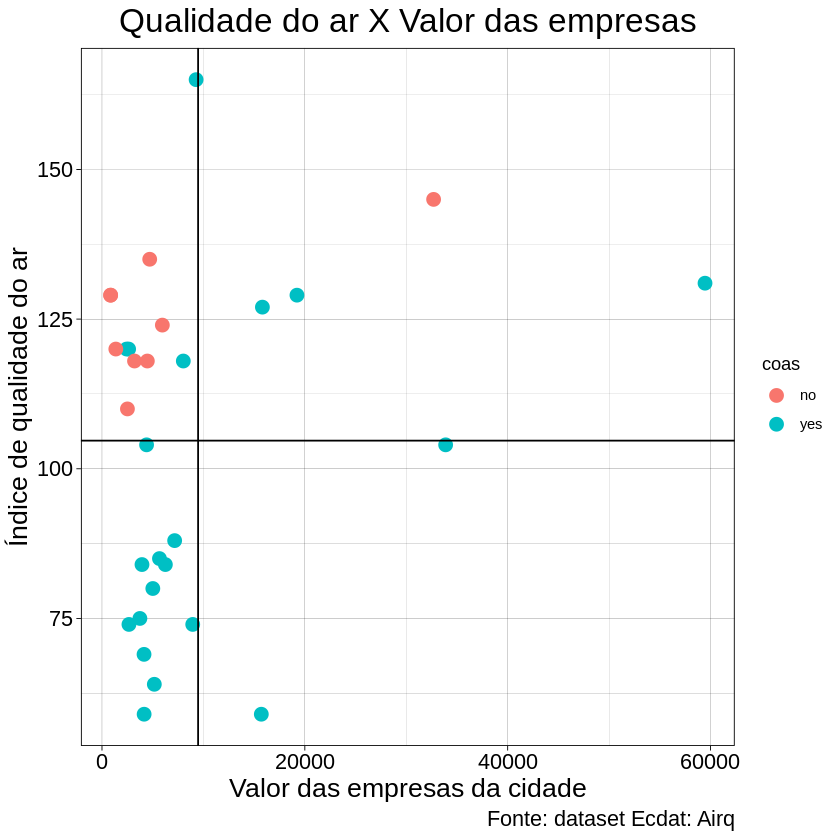

In [ ]:
ggplot(data= df, aes(x = medi, y= airq, color = coas))+
geom_point(size= 3.5)+
#geom_smooth(method = lm)+
geom_hline(yintercept = mean(df$airq))+
geom_vline(xintercept = mean(df$medi))+
labs(x= 'Valor das empresas da cidade', y= 'Índice de qualidade do ar', title = 'Qualidade do ar X Valor das empresas', caption= 'Fonte: dataset Ecdat: Airq')+
theme_linedraw()+
theme(
  plot.title=element_text(size = 20, hjust = 0.5),
  plot.caption = element_text(size=13, hjust=1),
  axis.title.y = element_text(size=16, hjust= 0.5),
  axis.title.x= element_text(size=16, hjust= 0.5),
  axis.text.x = element_text(size= 13),
  axis.text.y = element_text(size= 13)
)

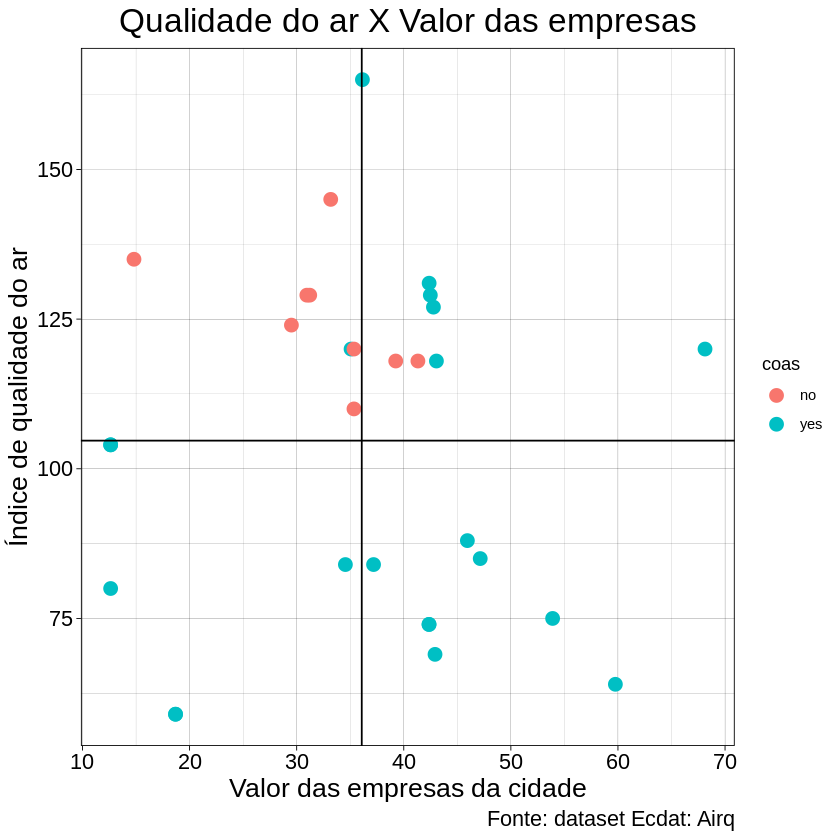

In [ ]:
ggplot(data= df, aes(x = rain, y= airq, color = coas))+
geom_point(size= 3.5)+
#geom_smooth(method = lm)+
geom_hline(yintercept = mean(df$airq))+
geom_vline(xintercept = mean(df$rain))+
labs(x= 'Valor das empresas da cidade', y= 'Índice de qualidade do ar', title = 'Qualidade do ar X Valor das empresas', caption= 'Fonte: dataset Ecdat: Airq')+
theme_linedraw()+
theme(
  plot.title=element_text(size = 20, hjust = 0.5),
  plot.caption = element_text(size=13, hjust=1),
  axis.title.y = element_text(size=16, hjust= 0.5),
  axis.title.x= element_text(size=16, hjust= 0.5),
  axis.text.x = element_text(size= 13),
  axis.text.y = element_text(size= 13)
)

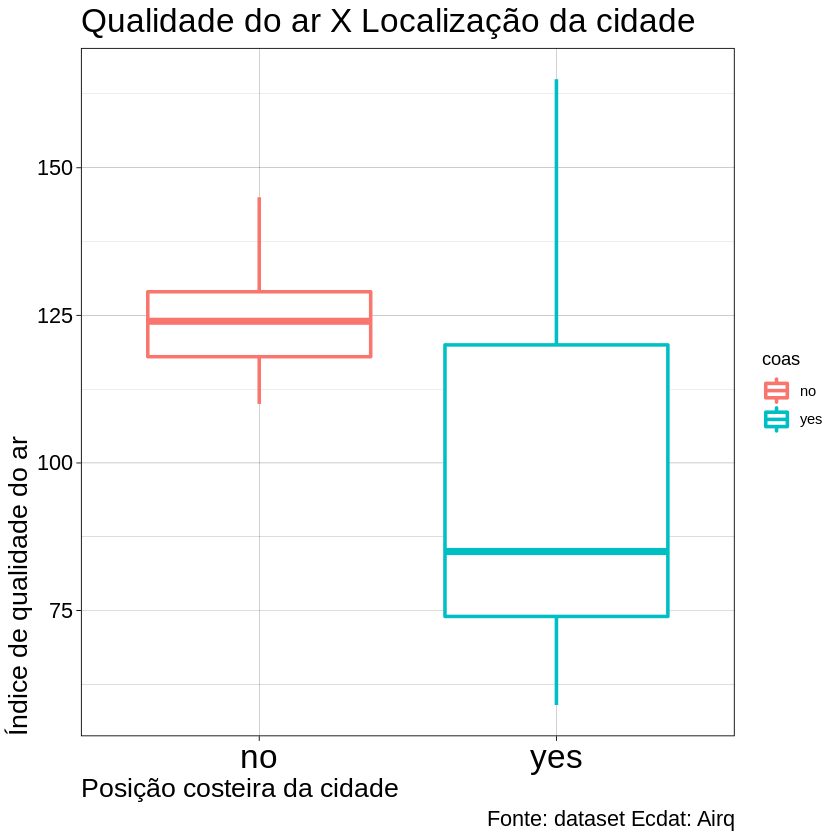

In [ ]:
ggplot(data= df, aes(x = coas, y= airq, color = coas))+
geom_boxplot(size= 1)+
labs(x= 'Posição costeira da cidade', y= 'Índice de qualidade do ar', title = 'Qualidade do ar X Localização da cidade', caption= 'Fonte: dataset Ecdat: Airq')+
theme_linedraw()+
theme(
  plot.title=element_text(size = 20, hjust = 0),
  plot.caption = element_text(size=13, hjust=1),
  axis.title.y = element_text(size=16, hjust= 0),
  axis.title.x= element_text(size=16, hjust= 0),
  axis.text.x = element_text(size= 20),
  axis.text.y = element_text(size= 13)
)

In [ ]:
colnames(df)

[1] "airq" "vala" "rain" "coas" "dens" "medi"

In [ ]:
round(cor(select(df, 'airq','vala','rain','dens','medi')),3)

,airq,vala,rain,dens,medi
airq,1.000,0.325,-0.026,-0.039,0.251
vala,0.325,1.000,-0.149,0.158,0.890
rain,-0.026,-0.149,1.000,0.009,-0.086
dens,-0.039,0.158,0.009,1.000,0.195
medi,0.251,0.890,-0.086,0.195,1.000


As únicas variáveis altamente correlacionadas são "medi" (renda média) e "vala" (valor das empresas)

# Modelagem e Avaliação do Modelo

In [ ]:
modelo1 <- lm(airq ~ vala + medi + rain + dens, data= df)
resumo <- summary((modelo1))
resumo


Call:
lm(formula = airq ~ vala + medi + rain + dens, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-43.405 -21.876   6.401  19.715  59.527 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 94.7030841 16.7851535   5.642 7.15e-06 ***
vala         0.0029918  0.0025234   1.186    0.247    
medi        -0.0003793  0.0009338  -0.406    0.688    
rain         0.0695169  0.3962661   0.175    0.862    
dens        -0.0008372  0.0018966  -0.441    0.663    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 28.31 on 25 degrees of freedom
Multiple R-squared:  0.1207,	Adjusted R-squared:  -0.02002 
F-statistic: 0.8577 on 4 and 25 DF,  p-value: 0.5027


Ajustando um modelo linear para as variáveis vemos primeiramente que as variáveis não possuem significância estatística, vemos que o r^2 é de 12%, e esse é o percentual que o modelo seria capaz de explicar da variação dos dados, a estatística F do modelo > 0,05 aponta que esse modelo não tem significãncia estatística para explicar o comportamento dos dados.

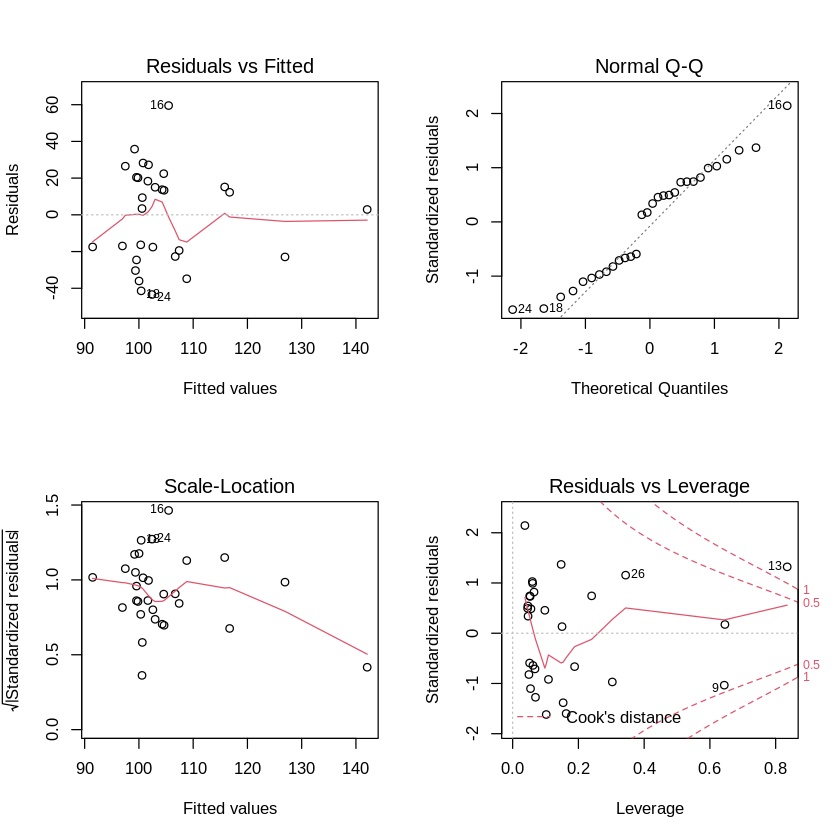

In [ ]:
par(mfrow=c(2,2))
plot(modelo1)

In [ ]:
shapiro.test(modelo1$residuals)


	Shapiro-Wilk normality test

data:  modelo1$residuals
W = 0.94611, p-value = 0.1329


Atende à normalidade dos resíduos

In [ ]:
gvlma(modelo1)


Call:
lm(formula = airq ~ vala + medi + rain + dens, data = df)

Coefficients:
(Intercept)         vala         medi         rain         dens  
 94.7030841    0.0029918   -0.0003793    0.0695169   -0.0008372  


ASSESSMENT OF THE LINEAR MODEL ASSUMPTIONS
USING THE GLOBAL TEST ON 4 DEGREES-OF-FREEDOM:
Level of Significance =  0.05 

Call:
 gvlma(x = modelo1) 

                     Value p-value                Decision
Global Stat        1.84181  0.7648 Assumptions acceptable.
Skewness           0.01827  0.8925 Assumptions acceptable.
Kurtosis           0.91760  0.3381 Assumptions acceptable.
Link Function      0.21273  0.6446 Assumptions acceptable.
Heteroscedasticity 0.69320  0.4051 Assumptions acceptable.

Avaliando o teste gvlma vemos que o modelo atende aos critérios dos mínimos quarados de normalidade dos resíduos, homocedasticidade, linearidade e independência das variáveis.

In [ ]:
modelo2 <- lm(airq ~ vala + dens, data= df)
resumo2 <- summary((modelo2))
resumo2


Call:
lm(formula = airq ~ vala + dens, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-45.372 -21.288   7.806  20.179  59.500 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 97.6677636  7.1971236  13.570 1.42e-13 ***
vala         0.0020581  0.0011104   1.853   0.0748 .  
dens        -0.0009187  0.0018182  -0.505   0.6175    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 27.34 on 27 degrees of freedom
Multiple R-squared:  0.1142,	Adjusted R-squared:  0.0486 
F-statistic: 1.741 on 2 and 27 DF,  p-value: 0.1945


In [ ]:
anova(modelo2, modelo1)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,27,20180.21,NA,NA,NA,NA
2,25,20033.17,2,147.0306,0.09174193,0.9126463


A analise de variância da anova aplicada aos dois modelos nos permite afirmar que com significância de 5% aceitamos a hipótese nula de que os dois modelos são iguais, sendo assim, pelo critério da parcimônia escolhemos o modelo mais simples.